# In this notebook, I'll show my implementation of Gradient Descend, and compare its result to the sklearn LinearRegression Model 

## First, A Quick preview on Gradient Descend

Gradient Descend is an optimization algorithm to find the best paremeters (slope and interception in case of univariate linear regression), to minimize a cost function, like the mean squared error (MSE), the most used in linear regression

when drawing the curve between one of the parameters, and the cost function, we'll see that there is a point, a global minimum for the curve, where the cost function is at its lowest, for some value for the said parameter (given the other parameters are constant)

the main idea of gradient descend it to:


1- Set a random values for the parameters to improves upon it


2- Well, get the gradient (that is, finding the partial derivatives of the cost function with respect to each input variable, which are the parameters),


3- Plug the parameters into the gradient


4- Multiply it by a learning rate $\alpha$	to get the step size, that is, how big of a step the algorithms takes to move in the opposite direction of the gradient (since the gradient is just the slope of the parameter $\theta$, so we want to go in the direction that causes that slope to become less steep, which means getting closer to the global minimum where the slope is 0) "the bigger the $\alpha$, the bigger the step"

5- Calculate the new parameters = old parameter - step size (the minus so that we go in the opposite direction)

## We iterate through steps 3 to 5 for a numbers of iteration, or when the cost function gets to some desired value, that's where the algorithm stops

Now, Let's start implementing that said algorithm 

In [ ]:
# Gradient Descend for Linear Regression
# y_predicted will be calculated as: y_predicted = m * x + b, where m is the slope and b is the y-intercept.
# for the loss function, we will use Mean Squared Error (MSE).
# For the sake of simplifing the differentiation, we will define the loss function as: loss = ((y - y_predicted) ** 2) / 2

import numpy as np
import matplotlib.pyplot as plt

# Sample data points (x, y)
x = np.random.randn(100)  # 100 random data points for x
y = 5.0 * x + 1.0 + np.random.randn(100) * 4  # y = 2x + 1 with some noise to simulate real-world data
                                                # the predicted parameters should be close to m=2.0 and b=1.0

# Initializing the parameters
m = 0.0  # slope
b = 0.0  # y-intercept

# Learning rate
learning_rate = 0.01 # Adjust as needed, just not too high or too low, and definitely not 0 (which would mean no learning)

def descend(x, y, m, b, learning_rate):
    n = len(y)  # number of data points
    y_predicted = m * x + b  # predicted values
    loss = np.mean((y - y_predicted) ** 2) / 2  # Mean Squared Error, which is our loss function: ((y - mx - b) ** 2) / 2

    dm = 0.0  # gradient with respect to m
    db = 0.0  # gradient with respect to b

    # Calculate gradients
    dm = (-1/n) * np.sum(x * (y - y_predicted))  # gradient with respect to m
    db = (-1/n) * np.sum(y - y_predicted)        # gradient with respect to b

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    return m, b, loss

# Iterate to optimize parameters
for i in range(700): # number of iterations, you can adjust this number based on how well the model is converging
    m, b, loss = descend(x, y, m, b, learning_rate)  # perform one step of gradient descent
    print(f"Iteration {i + 1}: m = {m:.4f}, b = {b:.4f}, loss = {loss:.4f}")     


Iteration 1: m = 0.0486, b = 0.0095, loss = 19.7922
Iteration 2: m = 0.0967, b = 0.0189, loss = 19.5482
Iteration 3: m = 0.1443, b = 0.0283, loss = 19.3093
Iteration 4: m = 0.1914, b = 0.0375, loss = 19.0752
Iteration 5: m = 0.2380, b = 0.0466, loss = 18.8460
Iteration 6: m = 0.2842, b = 0.0556, loss = 18.6214
Iteration 7: m = 0.3299, b = 0.0645, loss = 18.4015
Iteration 8: m = 0.3751, b = 0.0733, loss = 18.1860
Iteration 9: m = 0.4198, b = 0.0820, loss = 17.9750
Iteration 10: m = 0.4641, b = 0.0906, loss = 17.7683
Iteration 11: m = 0.5079, b = 0.0992, loss = 17.5658
Iteration 12: m = 0.5513, b = 0.1076, loss = 17.3674
Iteration 13: m = 0.5942, b = 0.1159, loss = 17.1732
Iteration 14: m = 0.6367, b = 0.1241, loss = 16.9829
Iteration 15: m = 0.6788, b = 0.1323, loss = 16.7965
Iteration 16: m = 0.7204, b = 0.1403, loss = 16.6139
Iteration 17: m = 0.7616, b = 0.1483, loss = 16.4350
Iteration 18: m = 0.8024, b = 0.1562, loss = 16.2599
Iteration 19: m = 0.8428, b = 0.1640, loss = 16.0883
It

Sklearn model: m = 4.7374, b = 0.8478
Sklearn loss: 7.8784
Custom model: m = 4.7338, b = 0.8477, loss = 7.8784


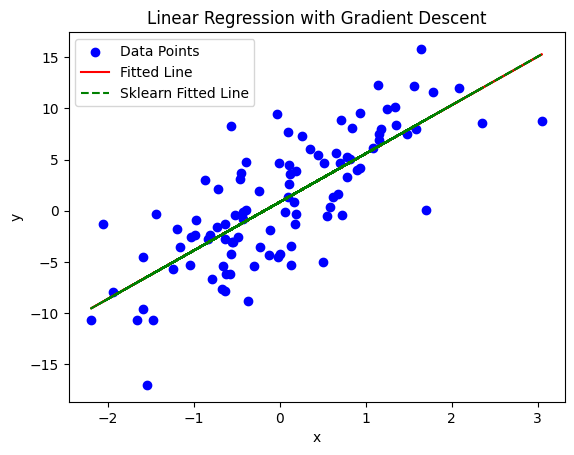

In [3]:
# now for the sklearn linear regression
from sklearn.linear_model import LinearRegression

# Create and fit the model using sklearn
model = LinearRegression()
X = x.reshape(-1, 1)  # reshape x to be a 2D array for sklearn
model.fit(X, y) 
y_predicted_sklearn = model.predict(X)  # predict using the sklearn model

# Compare the results
print(f"Sklearn model: m = {model.coef_[0]:.4f}, b = {model.intercept_:.4f}")
print(f"Sklearn loss: {np.mean((y - y_predicted_sklearn) ** 2) / 2:.4f}")

print(f"Custom model: m = {m:.4f}, b = {b:.4f}, loss = {loss:.4f}")

plt.scatter(x, y, label='Data Points', color='blue')  # plot the original data points
plt.plot(x, m * x + b, color='red', label='Fitted Line')  # plot the fitted line
plt.plot(x, y_predicted_sklearn, color='green', linestyle='--', label='Sklearn Fitted Line')  # plot the sklearn fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()  # display the plot